### 라이브러리와 데이터셋 불러오기

In [21]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

%matplotlib inline

### 데이터 분할 작업

In [38]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [40]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [41]:
# 클래스 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [42]:
# 10개의 고정된 인덱스 선택
fixed_indices = list(range(10))

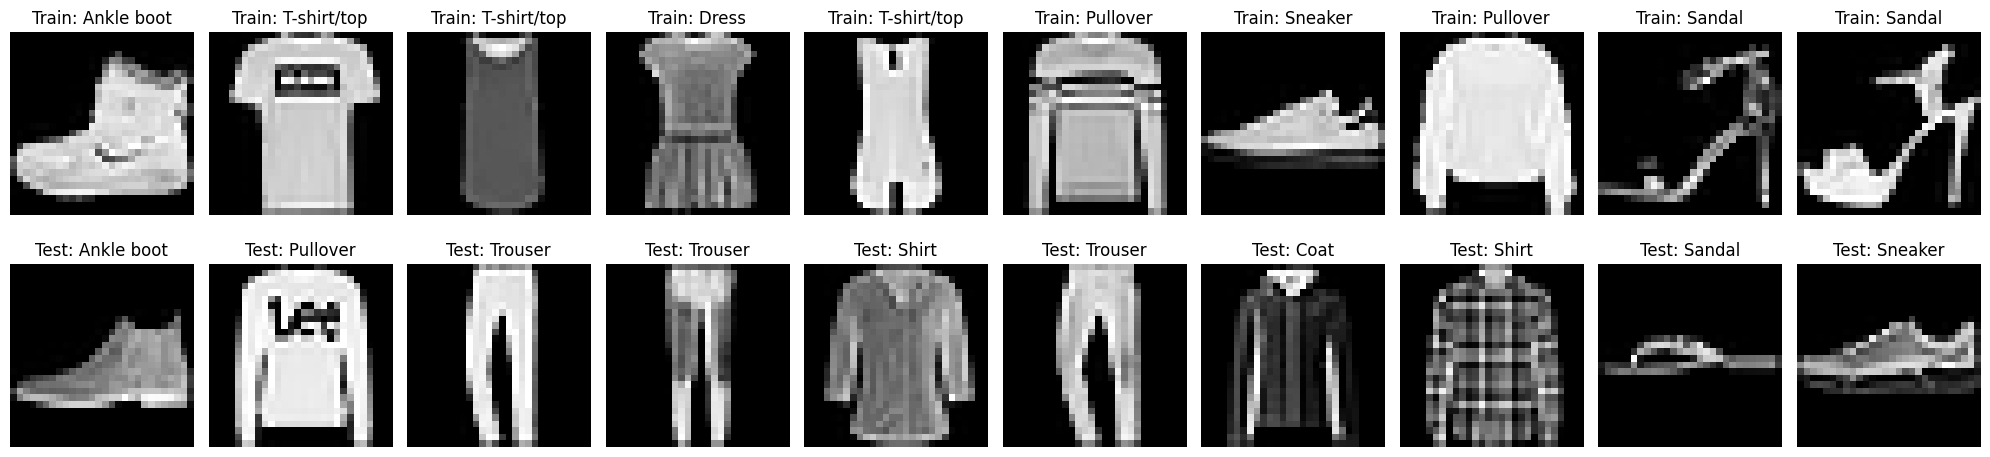

In [43]:
def plot_images(indices, train_images, train_labels, test_images, test_labels):
    plt.figure(figsize=(20, 5))

    for i, index in enumerate(indices):
        # 훈련 이미지
        plt.subplot(2, 10, i+1)
        plt.imshow(train_images[index], cmap='gray')
        plt.title(f"Train: {class_names[train_labels[index]]}")
        plt.axis('off')

        # 평가 이미지
        plt.subplot(2, 10, i+11)
        plt.imshow(test_images[index], cmap='gray')
        plt.title(f"Test: {class_names[test_labels[index]]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# 고정된 인덱스로 선택한 이미지 시각화
plot_images(fixed_indices, X_train, y_train, X_test, y_test)

### 데이터 표준화 작업 - 각 변수를 255.0의 부동소수점으로 나누어 0과 1 사이의 값으로 변환

In [44]:
X_train_nomalized = X_train / 255.0
X_test_nomalized = X_test / 255.0

In [49]:
X_train_nomalized.shape

(60000, 28, 28)

### 이미지 크기 재할당

In [52]:
X_train_reshape = X_train.reshape(-1, 28*28)
X_test_reshape = X_test.reshape(-1, 28*28)

In [54]:
print(X_train_reshape.shape)
print(X_test_reshape.shape)

(60000, 784)
(10000, 784)


### 인공 신경망 모델 만들기

In [58]:
model = tf.keras.models.Sequential()

In [59]:
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (784,)))

In [60]:
model.add(tf.keras.layers.Dropout(0.2))

In [61]:
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [74]:
model.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(X_train_reshape, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7610 - accuracy: 0.7359
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7682 - accuracy: 0.7340
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7418 - accuracy: 0.7464
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7280 - accuracy: 0.7487
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7404 - accuracy: 0.7479
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7421 - accuracy: 0.7492
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7334 - accuracy: 0.7494
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7160 - accuracy: 0.7551
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7349 - accuracy: 0.7500
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.736

### 신경망 평가

In [78]:
test_loss, test_accuracy = model.evaluate(X_test_reshape, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8570 - accuracy: 0.8003


In [79]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8003000020980835
